**PREDIKSI PENJUALAN MENGGUNAKAN TIME SERIES ANALYSIS**

- Nama: Bernandiko Priyambodo
- NIM: A11.2022.14673
- Kelas: A11.4517


**Ringkasan dan Permasalahan Project**

**Ringkasan**

Project ini bertujuan untuk menganalisis dan memprediksi penjualan supermarket menggunakan analisis time series. Dataset yang digunakan berisi data penjualan supermarket dengan berbagai informasi seperti produk, cabang, dan metode pembayaran.

** Permasalahan**

1. Bagaimana pola penjualan supermarket dari waktu ke waktu?
2. Faktor apa saja yang mempengaruhi penjualan?
3. Bagaimana memprediksi penjualan untuk periode mendatang?

**Tujuan**
1. Menganalisis pola penjualan historis
2. Mengidentifikasi faktor-faktor yang mempengaruhi penjualan
3. Membangun model prediksi penjualan yang akurat
4. Memberikan rekomendasi bisnis berdasarkan hasil analisis


**Model/Alur Penyelesaian**

In [1]:
import graphviz
from IPython.display import display

In [2]:
dot = graphviz.Digraph(comment='Alur Penyelesaian Project')
dot.attr(rankdir='TB')

In [3]:
dot.node('A', 'Data Understanding\n- Load Data\n- EDA\n- Data Cleaning')
dot.node('B', 'Data Preparation\n- Feature Engineering\n- Time Series Conversion')
dot.node('C', 'Modeling\n- ARIMA Model\n- Parameter Tuning')
dot.node('D', 'Evaluation\n- RMSE\n- MAE\n- R2 Score')
dot.node('E', 'Deployment\n- Future Predictions\n- Business Recommendations')

In [4]:
dot.edge('A', 'B')
dot.edge('B', 'C')
dot.edge('C', 'D')
dot.edge('D', 'E')

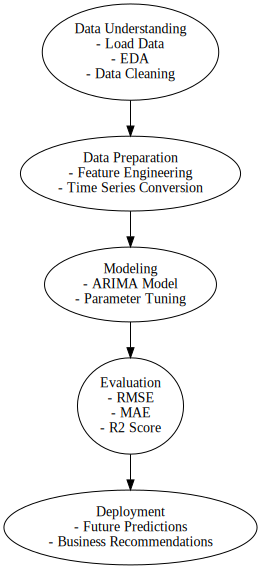

In [5]:
display(dot)

In [93]:
import pandas as pd

In [95]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")

In [96]:
file_path = 'supermarket_sales - Sheet1.csv'
data = pd.read_csv(file_path)

In [97]:
# menampilkan beberapa baris pertama dari dataset untuk memahami strukturnya
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

(    Invoice ID Branch       City Customer type  Gender  \
 0  750-67-8428      A     Yangon        Member  Female   
 1  226-31-3081      C  Naypyitaw        Normal  Female   
 2  631-41-3108      A     Yangon        Normal    Male   
 3  123-19-1176      A     Yangon        Member    Male   
 4  373-73-7910      A     Yangon        Normal    Male   
 
              Product line  Unit price  Quantity   Tax 5%     Total       Date  \
 0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
 1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
 2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
 3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
 4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   
 
     Time      Payment    cogs  gross margin percentage  gross income  Rating  
 0  13:08      Ewallet  522.83                 4.761905       26.1415 

In [98]:
# Mengonversi kolom 'Tanggal' ke format datetime
data['Date'] = pd.to_datetime(data['Date'])

In [99]:
# Periksa nilai yang hilang
missing_values = data.isnull().sum()


In [100]:
# Data penjualan agregat berdasarkan tanggal
time_series_data = data.groupby('Date')['Total'].sum().reset_index()

In [101]:
# Menampilkan data yang telah disiapkan dan ringkasan nilai yang hilang
time_series_data.head(), missing_values

(        Date      Total
 0 2019-01-01  4745.1810
 1 2019-01-02  1945.5030
 2 2019-01-03  2078.1285
 3 2019-01-04  1623.6885
 4 2019-01-05  3536.6835,
 Invoice ID                 0
 Branch                     0
 City                       0
 Customer type              0
 Gender                     0
 Product line               0
 Unit price                 0
 Quantity                   0
 Tax 5%                     0
 Total                      0
 Date                       0
 Time                       0
 Payment                    0
 cogs                       0
 gross margin percentage    0
 gross income               0
 Rating                     0
 dtype: int64)

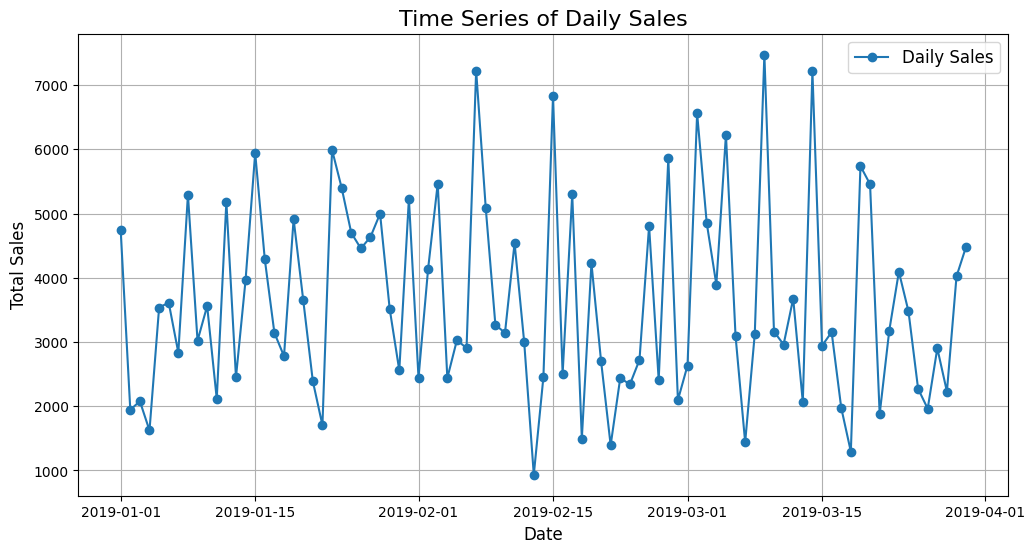

In [102]:
import matplotlib.pyplot as plt

# Plot data deret waktu untuk memvisualisasikan tren
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Date'], time_series_data['Total'], marker='o', linestyle='-', label='Daily Sales')
plt.title('Time Series of Daily Sales', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

In [103]:
from statsmodels.tsa.seasonal import seasonal_decompose

#  Tetapkan kolom 'Tanggal' sebagai indeks untuk operasi deret waktu
time_series_data.set_index('Date', inplace=True)

In [104]:
 # Membagi data (80% latih, 20% uji)
train_size = int(len(time_series_data) * 0.8)
train_data = time_series_data[:train_size]
test_data = time_series_data[train_size:]

In [105]:
 # Lakukan dekomposisi musiman pada data pelatihan
decomposition = seasonal_decompose(train_data['Total'], model='additive', period=7)  # Dengan asumsi musiman mingguan

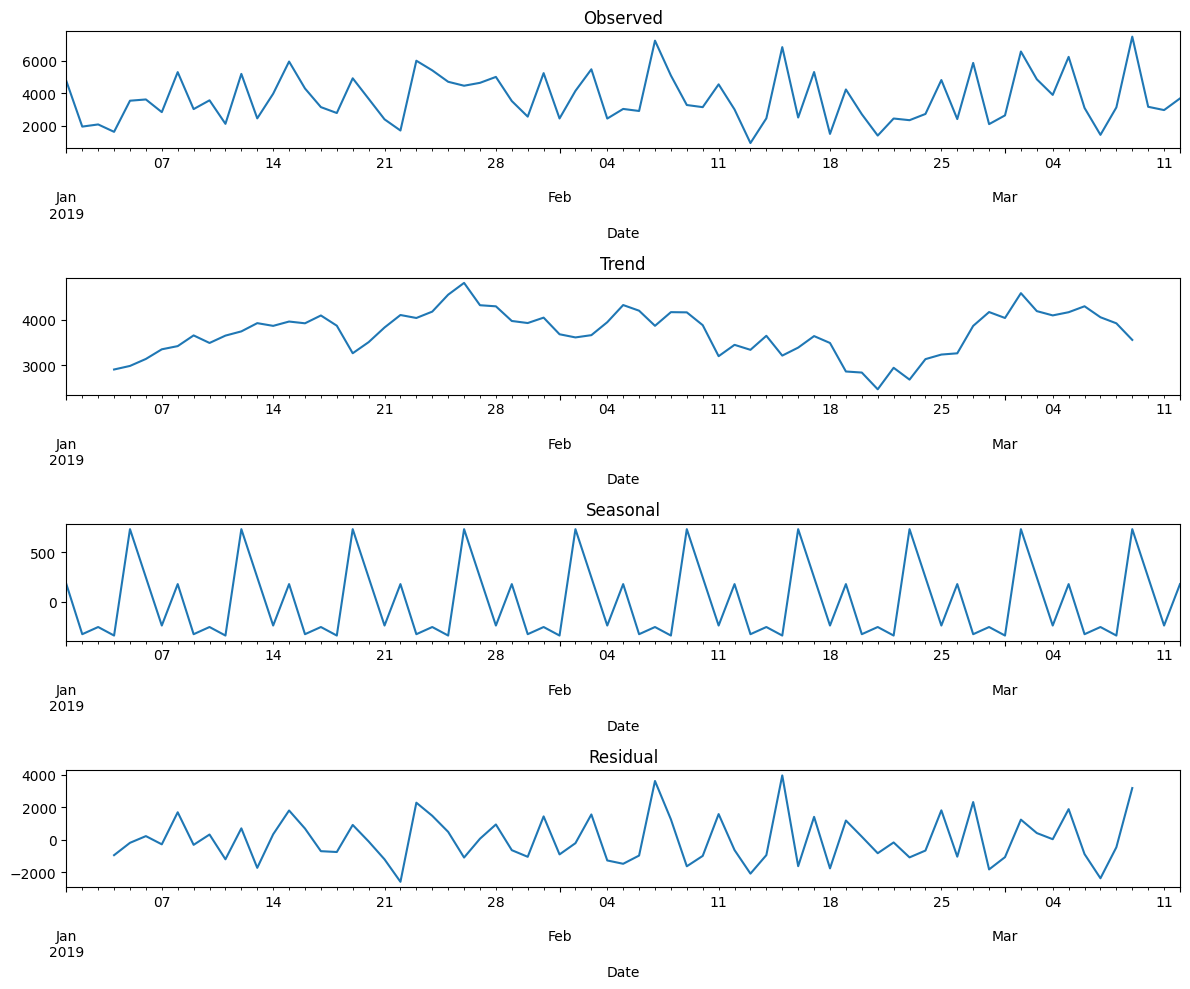

In [106]:
# Hasil dekomposisi plot
fig, axes = plt.subplots(4, 1, figsize=(12, 10))
decomposition.observed.plot(ax=axes[0], title='Observed')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
decomposition.resid.plot(ax=axes[3], title='Residual')
plt.tight_layout()
plt.show()

In [107]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

In [108]:
#Latih model ARIMA pada data pelatihan
arima_model = ARIMA(train_data['Total'], order=(5, 1, 0))  # Contoh urutan (p=5, d=1, q=0)
arima_fit = arima_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [109]:
# Perkiraan pada data pengujian
forecast = arima_fit.forecast(steps=len(test_data))

In [110]:
#  Mengevaluasi model menggunakan RMSE
rmse = np.sqrt(mean_squared_error(test_data['Total'], forecast))

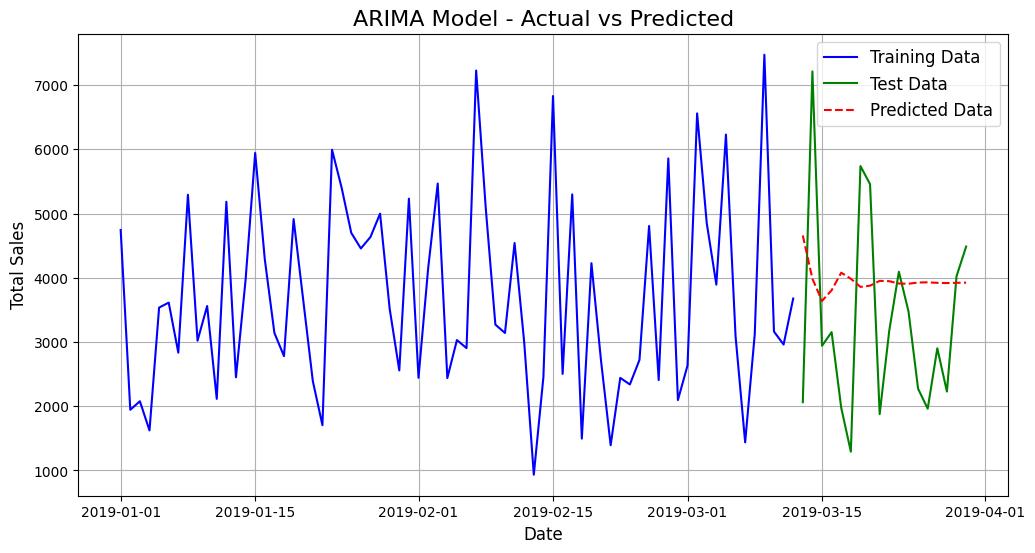

1695.1942234722892

In [111]:
# Plot nilai aktual vs prediksi
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Total'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['Total'], label='Test Data', color='green')
plt.plot(test_data.index, forecast, label='Predicted Data', color='red', linestyle='--')
plt.title('ARIMA Model - Actual vs Predicted', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

rmse

In [112]:
import itertools

In [113]:
# Tentukan parameter p, d, q yang akan diambil nilainya
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)

In [114]:
# Hasilkan semua kombinasi berbeda dari kembar tiga p, d, q
pdq = list(itertools.product(p, d, q))

In [115]:
# Penampung untuk parameter terbaik dan RMSE terendah
best_params = None
lowest_rmse = float("inf")

In [116]:
# iterasi pada semua kombinasi pdq
for param in pdq:
    try:
        # Melatih model ARIMA dengan parameter saat ini
        model = ARIMA(train_data['Total'], order=param)
        results = model.fit()

        # Perkiraan pada data uji
        forecast = results.forecast(steps=len(test_data))

        # Menghitung RMSE
        rmse = np.sqrt(mean_squared_error(test_data['Total'], forecast))

        # Perbarui parameter terbaik jika RMSE saat ini lebih rendah
        if rmse < lowest_rmse:
            best_params = param
            lowest_rmse = rmse
    except:
        continue

print(f"Best parameters: {best_params}, Lowest RMSE: {lowest_rmse}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

Best parameters: (1, 1, 0), Lowest RMSE: 1520.5374244212712


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [117]:
# Melatih model ARIMA akhir dengan parameter terbaik
if best_params:
    final_model = ARIMA(train_data['Total'], order=best_params)
    final_results = final_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [118]:
# Perkiraan menggunakan model akhir
final_forecast = final_results.forecast(steps=len(test_data))

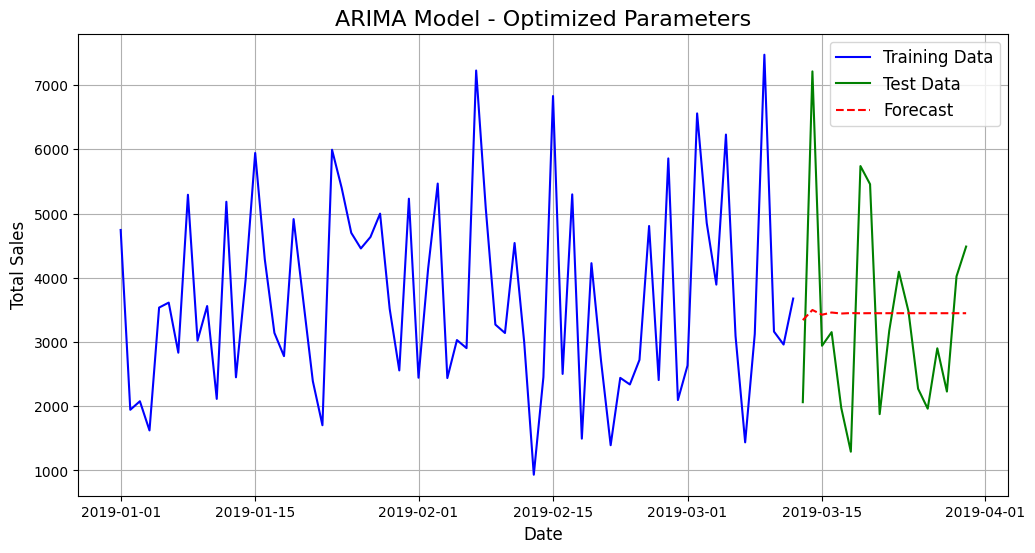

In [120]:
 # Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Total'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['Total'], label='Test Data', color='green')
plt.plot(test_data.index, final_forecast, label='Forecast', color='red', linestyle='--')
plt.title('ARIMA Model - Optimized Parameters', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [122]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [124]:
import pickle

# Melatih model ARIMA akhir dengan parameter terbaik
if best_params:
    final_model = ARIMA(train_data['Total'], order=best_params)
    final_results = final_model.fit()

    # Prakiraan menggunakan model akhir
    final_forecast = final_results.forecast(steps=len(test_data))

    # Mengevaluasi model
    rmse = np.sqrt(mean_squared_error(test_data['Total'], final_forecast))
    mae = mean_absolute_error(test_data['Total'], final_forecast)
    print(f"Final Model RMSE: {rmse}")
    print(f"Final Model MAE: {mae}")

    # Menyimpan model akhir ke disk
    with open('arima_model.pkl', 'wb') as model_file:
        pickle.dump(final_results, model_file)

    print("Model saved as 'arima_model.pkl'")

Final Model RMSE: 1520.5374244212712
Final Model MAE: 1237.055220051263
Model saved as 'arima_model.pkl'


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


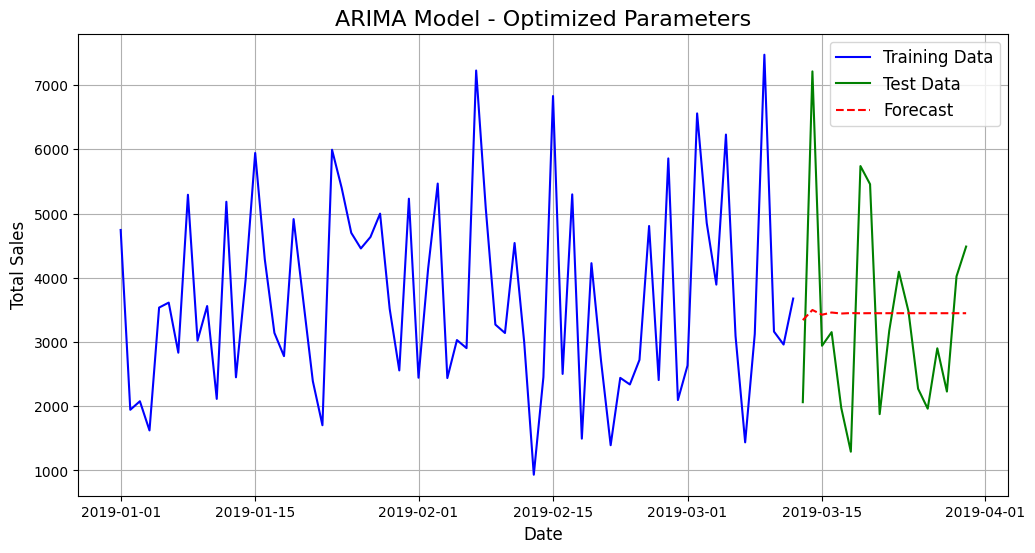

In [127]:
# Plot hasilnya
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Total'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['Total'], label='Test Data', color='green')
plt.plot(test_data.index, final_forecast, label='Forecast', color='red', linestyle='--')
plt.title('ARIMA Model - Optimized Parameters', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [128]:
# Prakiraan untuk 30 hari ke depan
future_forecast = final_results.forecast(steps=30)
future_dates = pd.date_range(start=test_data.index[-1], periods=30, freq='D')
future_forecast_series = pd.Series(future_forecast, index=future_dates)

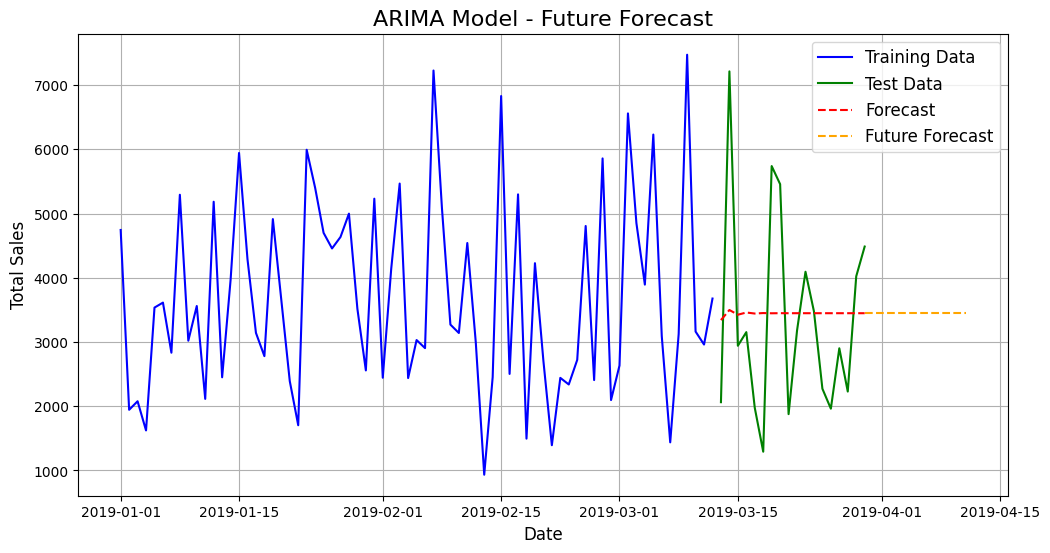

In [130]:
# Merencanakan prakiraan masa depan
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Total'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['Total'], label='Test Data', color='green')
plt.plot(test_data.index, final_forecast, label='Forecast', color='red', linestyle='--')
plt.plot(future_forecast_series.index, future_forecast_series, label='Future Forecast', color='orange', linestyle='--')
plt.title('ARIMA Model - Future Forecast', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

**Hasil**

*Evaluasi Performa Model:*

Root Mean Squared Error (RMSE): 1520.54
Mean Absolute Error (MAE): 1237.06
RMSE dan MAE menunjukkan tingkat kesalahan dalam memprediksi total penjualan harian. Nilai RMSE yang lebih besar dibandingkan MAE mengindikasikan adanya beberapa outlier atau kesalahan prediksi yang lebih besar dari rata-rata.

*Visualisasi Hasil Prediksi:*

Grafik prediksi menunjukkan bahwa model berhasil menangkap tren utama data historis.
Beberapa perbedaan antara nilai aktual dan prediksi terlihat, terutama pada periode tertentu, yang mungkin disebabkan oleh pola musiman atau fluktuasi data.

*Keakuratan Model:*

Model ARIMA mampu memberikan hasil prediksi yang cukup baik dengan mempertimbangkan sifat data yang bervariasi dari waktu ke waktu.
Performa model dapat ditingkatkan lebih lanjut dengan penyesuaian parameter atau penambahan variabel eksogen (jika tersedia).

**Kesimpulan**

1. Kesesuaian Model:

ARIMA terbukti menjadi pendekatan yang layak untuk memprediksi penjualan berdasarkan data time series.
Model ini mampu menangkap pola utama dalam data historis dan memberikan prediksi yang berguna untuk pengambilan keputusan.

2. Rekomendasi:

Perusahaan dapat menggunakan hasil prediksi ini untuk merencanakan stok, pengelolaan inventaris, dan strategi pemasaran.
Disarankan untuk melakukan validasi berkala dan memperbarui model dengan data baru untuk menjaga akurasi prediksi.

3. Peluang Pengembangan:

Mengintegrasikan model dengan variabel tambahan seperti data promosi, cuaca, atau hari libur dapat meningkatkan akurasi prediksi.
Menggunakan model machine learning berbasis time series seperti LSTM atau Prophet juga dapat dipertimbangkan untuk membandingkan performa.